# Gender classfication

Developing a gender prediction model is very benifical and has many application. For example, it can be used in advertizments, consultnant, automatic costumer sevices, etc. Fortunetelly, there are audio files dataset were collected from "Mozilla Common Voice" and “Ryerson AudioVisual Database of Emotional Speech and Song". Having such useful data can be used effictivly, and therfore this project will use this data to build a machine learning model that can predict the gender of a voice.

Datasets contains 20 feature columns and 1 column for denoting the label. The 20 statistical features were extracted through the Frequency Spectrum Analysis using R programming Language. Meanfreq is an example of the features as the same as mode, IQR, etc.

This dataset can be found on Kaggle : https://www.kaggle.com/rohitzaman/gender-age-and-emotion-detection-from-voice



Read the dataset and pre-process the features
read in 'cleaned_gender.csv'

In [1]:
%matplotlib inline

# Numerical libraries
import numpy as np  
from sklearn.preprocessing import OneHotEncoder

# to handle data in form of rows and columns 
import pandas as pd  

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics  

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Label encoder 
from sklearn.preprocessing import LabelEncoder

# Support Vector Classifier
from sklearn.svm import SVC

# PCA Related
from sklearn.decomposition import PCA

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Cross Validation related
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from google.colab import files
uploaded = files.upload()
import io
gender = pd.read_csv(io.BytesIO(uploaded['cleaned_gender.csv']))
# Dataset is now stored in a Pandas Dataframe
gender.head()

Saving cleaned_gender.csv to cleaned_gender.csv


,Unnamed: 0,age,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,young,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,0.627872,0.086962,0.133338,0.121968,0.047337,0.277457,0.822656,0.0,4.687500,4.687500,0.076296,male
1,84,young,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,0.478175,0.101332,0.137433,0.111204,0.047151,0.277457,1.313384,0.0,6.046875,6.046875,0.135811,male
2,85,matured,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,0.557276,0.106545,0.142227,0.118711,0.047013,0.275862,0.593750,0.0,6.539062,6.539062,0.096102,male
3,87,young,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,0.708279,0.108583,0.133325,0.116200,0.047105,0.279070,0.424922,0.0,5.812500,5.812500,0.081880,male
4,88,matured,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,0.778489,0.101534,0.130487,0.114802,0.047151,0.279070,0.198070,0.0,1.078125,1.078125,0.131579,male


**Split data into X and Y, such that X is the feature and y is the label to be predicted**

In [2]:
Y = gender.iloc[:,-1]  # Y is the label that we need to predect 
X = gender.iloc[:,2:-1]  # X is the feature that we use for predect

# Feature selection

Let us analays the feature and see if we can delete some features that have high corolation.



Now, plot the labels (male,female) vs each feature to observe the distribution of each feature of the labels.

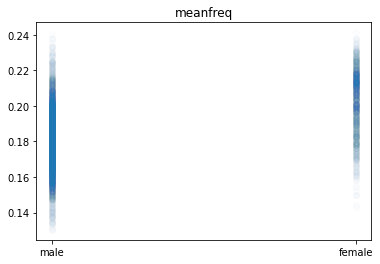

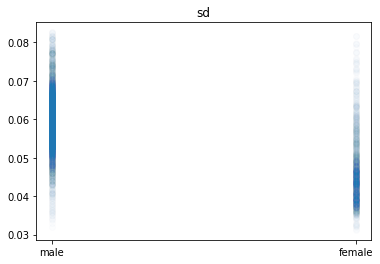

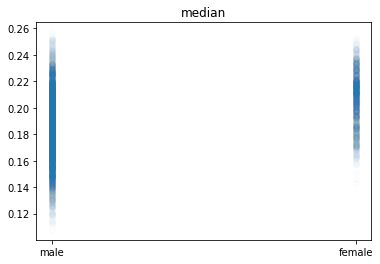

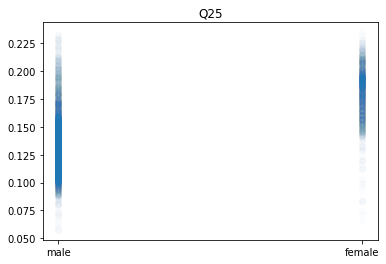

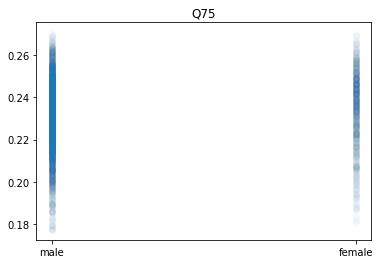

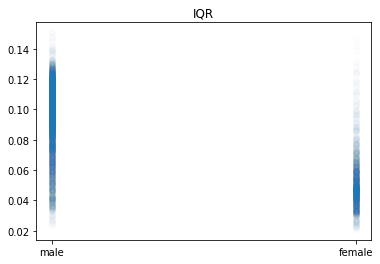

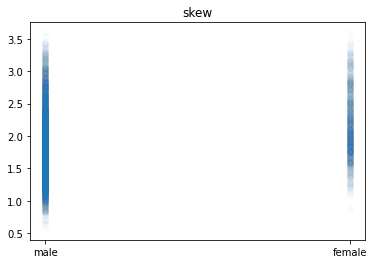

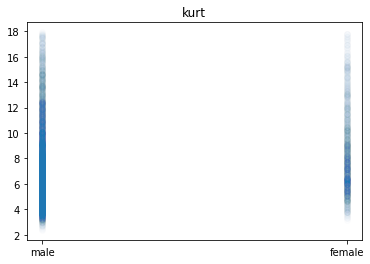

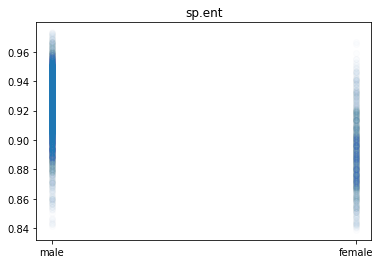

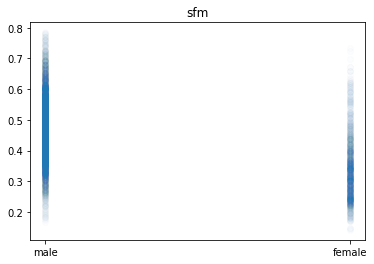

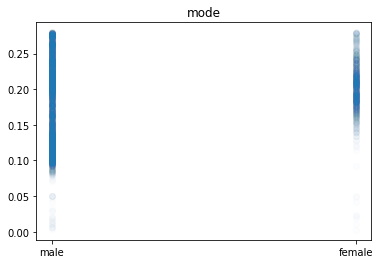

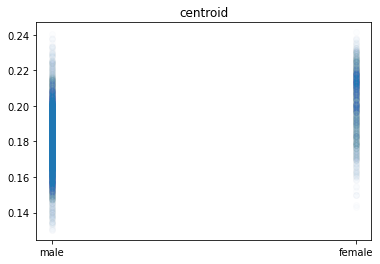

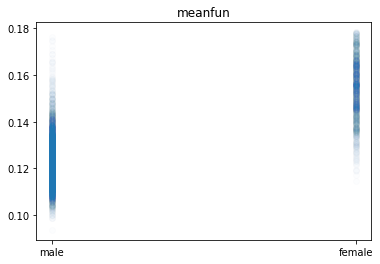

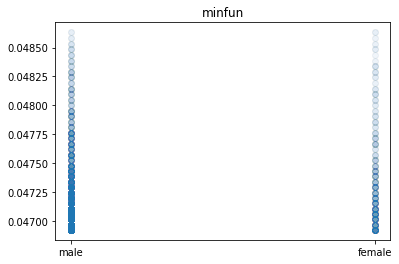

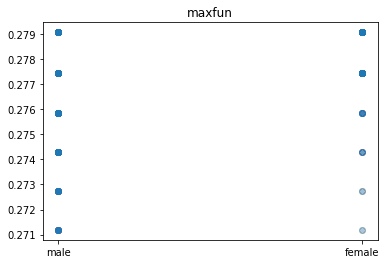

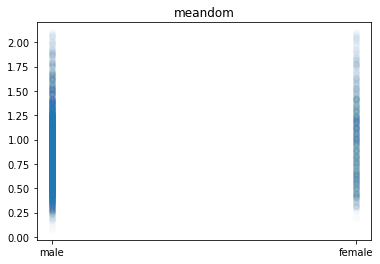

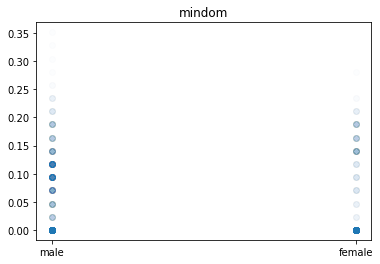

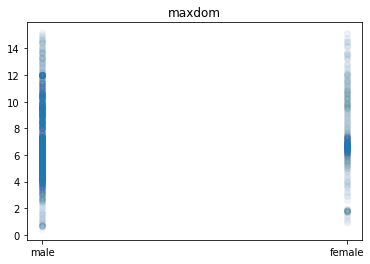

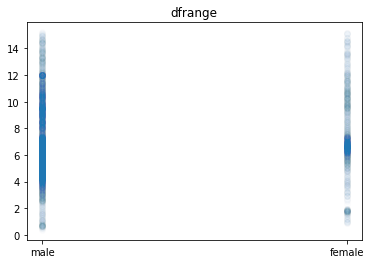

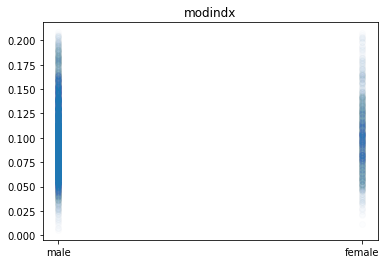

In [3]:
Features = X.columns
alpha = 0.01

for item in Features:  
  plt.figure()
  plt.subplot()
  plt.scatter(Y, X[item], alpha= alpha)
  plt.title(item)

The modindx is a pitch measure, that assesses the center of the distribution.

Text(0.5, 1.0, 'modindx - The modindx is a pitch measure, that assesses the center of the distribution.')

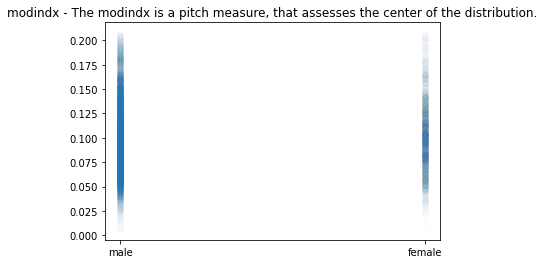

In [4]:
alpha = 0.01 
plt.figure()
plt.subplot()

plt.scatter(Y, X.modindx, alpha= alpha)
plt.title('modindx - The modindx is a pitch measure, that assesses the center of the distribution.')

Now, let us list the features and do one hot endoding to the labels.

In [5]:
Features = X.columns 


print('The feature count : ',len(Features))    # the number of features we have 
print('list of feature : ',Features)

Y = pd.get_dummies(Y)
Y = Y.to_numpy()

The feature count :  20
list of feature :  Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


Now let us try to observe the data more

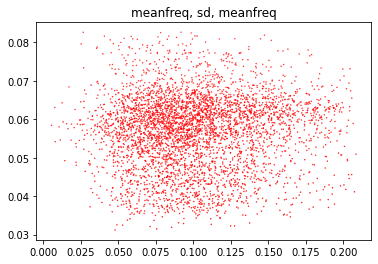

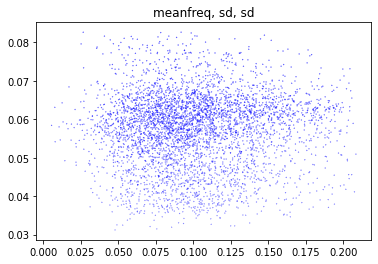

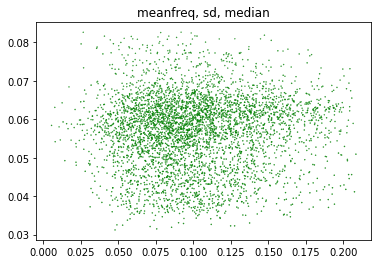

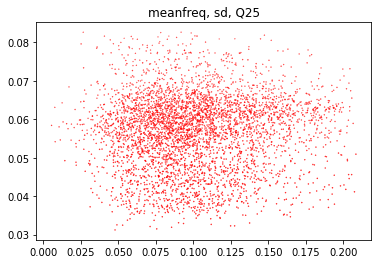

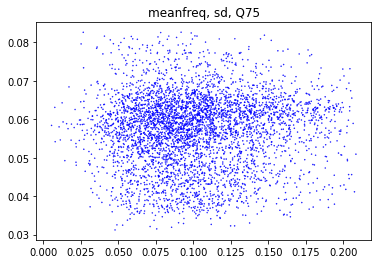

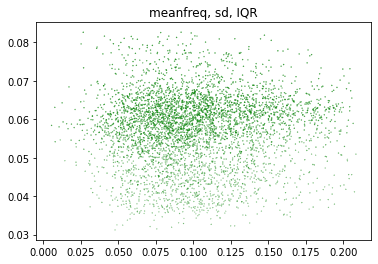

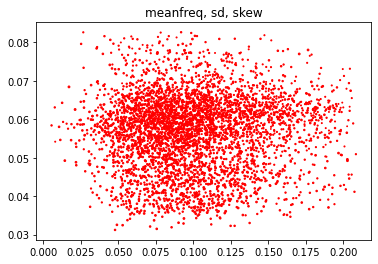

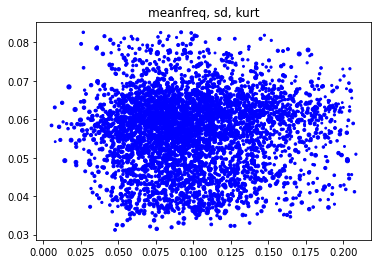

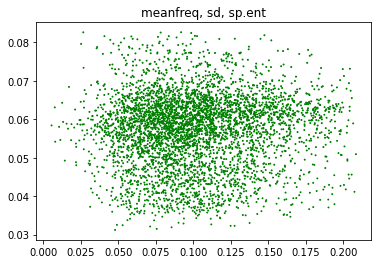

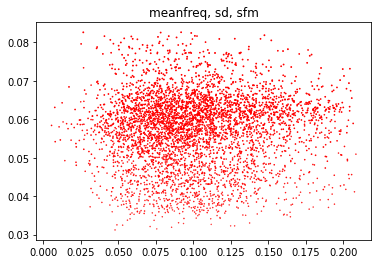

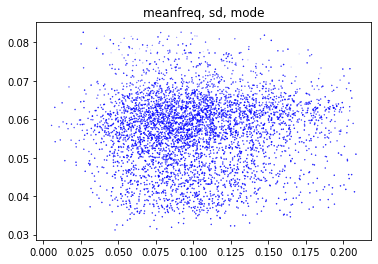

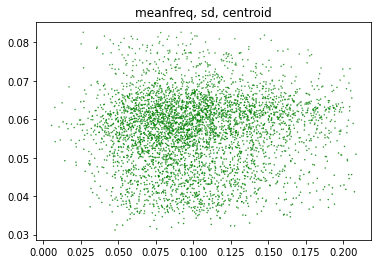

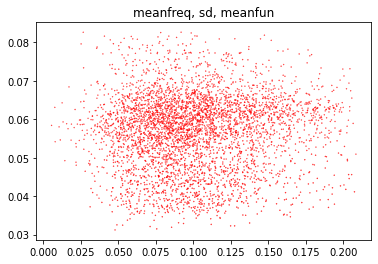

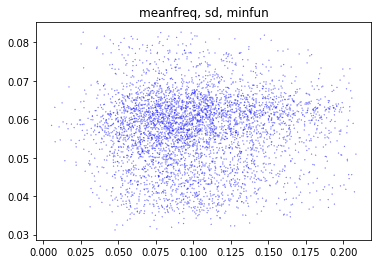

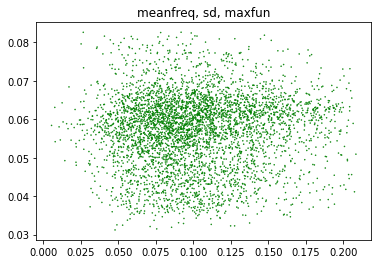

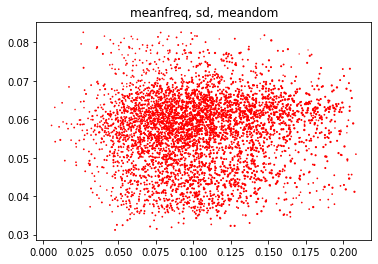

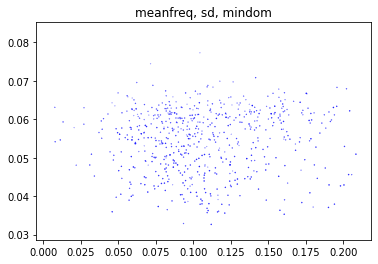

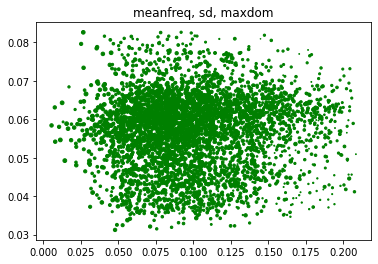

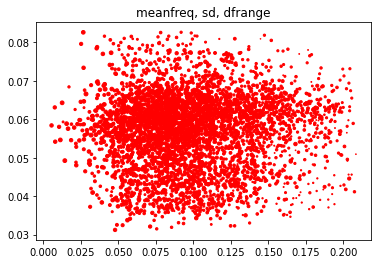

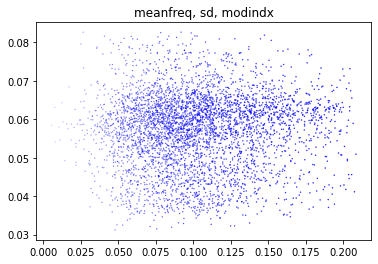

In [6]:
# importing mplot3d toolkits
import itertools
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

colors = itertools.cycle(["r", "b", "g"])

for i in Features:
  fig = plt.figure()
  ax = fig.add_subplot()

  #ax = plt.axes(projection='2d')
  ax.scatter(X.modindx, X.sd, X[i],  c=next(colors), cmap='viridis')

  #ax.scatter(X[i], X.modindx, X.sd , c = Y)
  plt.title('meanfreq, sd, '+i)
  plt.show()

Correlation analysis
Now, we will try to find out if there are features which have high corrolation so we can remove them.

In [7]:
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr

for i in Features:
  for j in Features:
    # Apply the pearsonr()
    corr, _ = pearsonr(X[i], X[j])
    print(i + " vs " + j)
    print('Pearsons correlation: %.3f' % corr)




meanfreq vs meanfreq
Pearsons correlation: 1.000
meanfreq vs sd
Pearsons correlation: -0.630
meanfreq vs median
Pearsons correlation: 0.901
meanfreq vs Q25
Pearsons correlation: 0.891
meanfreq vs Q75
Pearsons correlation: 0.748
meanfreq vs IQR
Pearsons correlation: -0.516
meanfreq vs skew
Pearsons correlation: 0.079
meanfreq vs kurt
Pearsons correlation: -0.031
meanfreq vs sp.ent
Pearsons correlation: -0.698
meanfreq vs sfm
Pearsons correlation: -0.788
meanfreq vs mode
Pearsons correlation: 0.658
meanfreq vs centroid
Pearsons correlation: 1.000
meanfreq vs meanfun
Pearsons correlation: 0.509
meanfreq vs minfun
Pearsons correlation: 0.103
meanfreq vs maxfun
Pearsons correlation: 0.038
meanfreq vs meandom
Pearsons correlation: 0.161
meanfreq vs mindom
Pearsons correlation: 0.180
meanfreq vs maxdom
Pearsons correlation: 0.030
meanfreq vs dfrange
Pearsons correlation: 0.027
meanfreq vs modindx
Pearsons correlation: 0.023
sd vs meanfreq
Pearsons correlation: -0.630
sd vs sd
Pearsons correla

In [8]:
Y = gender.iloc[:,-1]  # Y is the label that we need to predect 
X = gender.iloc[:,2:-1]  # X is the feature that we use for predect

we will drop the features maxdom and centroid, since the first one is highlt corrolated with dfrange feature and the 2nd one is highly corrolated with mean frequency feature

In [9]:
drops_list = ['maxdom', 'centroid'] 

for feature in drops_list:
	X = X.drop(feature,1)

**Checking data balance**

Now, plot the count for the gender (male, female) to observe if the data is balanced or not

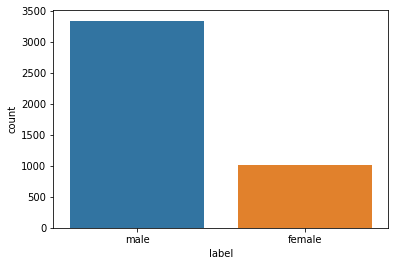

In [10]:
sns.countplot(data=gender, x = 'label')

It is clear that the data is not balanced and therfore we need to balance it by doing over sampling, for example, on the training data. But we need to split first!


create train_data, train_labels numpy arrays

split train_data, train_labels into 80-20% train_data, train_labels, test_data, test_labels using scitkit-learn's train_test_split

In [11]:
train_data, part_data, train_labels, part_labels = train_test_split(X, Y, test_size =0.2, random_state=0)
val_data, test_data, val_labels, test_labels = train_test_split(part_data, part_labels, test_size =0.5, random_state=0)

In [12]:
pip install -U imbalanced-learn

In [13]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

**Before the sampling.**

In [14]:
print("The sample distrebution")
print(sorted(Counter(train_labels).items()))

The sample distrebution
[('female', 820), ('male', 2668)]


**After sampling**

In [15]:
ros = RandomOverSampler(random_state=0)
train_data, train_labels = ros.fit_resample(train_data, train_labels)
print(sorted(Counter(train_labels).items()))

[('female', 2668), ('male', 2668)]


Now we have done the feature selcetion and balanced the data(training data). We can now feed the training to the classifier and observe the results.

*Preprocessing*

In [16]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
val_data = scaler.transform(val_data)

In [17]:
train_data.shape , val_data.shape , test_data.shape, train_labels.shape , val_labels.shape , test_labels.shape

((5336, 18), (436, 18), (437, 18), (5336,), (436,), (437,))

In [18]:
X = train_data
Y = train_labels

# **SVM classifier**

we will diffrent kernals on the validation set, we will try RBF, sigmoid, poly and linear.

***1-RBF***

In [19]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma='auto') # Linear Kernel

#Train the model using the training sets
clf.fit(X, Y)

#Predict the response for training data
y_pred = clf.predict(X)
# Model Accuracy: how often is the classifier correct?
print("Accuracy on training data:",metrics.accuracy_score(Y, y_pred))

#Predict the response for validation data
y_pred = clf.predict(val_data)
print("Accuracy on validation data:",metrics.accuracy_score(val_labels, y_pred))

############################################################
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on training data: 0.9606446776611695
Accuracy on validation data: 0.9243119266055045
              precision    recall  f1-score   support

      female       0.78      0.92      0.84        96
        male       0.98      0.93      0.95       340

    accuracy                           0.92       436
   macro avg       0.88      0.92      0.90       436
weighted avg       0.93      0.92      0.93       436



***2-Linear***

In [20]:
clf = svm.SVC(kernel='linear', gamma='auto') 
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on training data: 0.9272863568215892
Accuracy on validation data: 0.9059633027522935
              precision    recall  f1-score   support

      female       0.72      0.93      0.81        96
        male       0.98      0.90      0.94       340

    accuracy                           0.91       436
   macro avg       0.85      0.91      0.87       436
weighted avg       0.92      0.91      0.91       436



***3-sigmoid***

In [21]:
clf = svm.SVC(kernel='sigmoid', gamma='auto') 
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on training data: 0.83452023988006
Accuracy on validation data: 0.8325688073394495
              precision    recall  f1-score   support

      female       0.59      0.79      0.68        96
        male       0.93      0.84      0.89       340

    accuracy                           0.83       436
   macro avg       0.76      0.82      0.78       436
weighted avg       0.86      0.83      0.84       436



4-Poly

In [22]:
clf = svm.SVC(kernel='poly',degree=2) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 2:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 2:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=3) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 3:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 3:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=4) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 4:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 4:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=5) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 5:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 5:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

clf = svm.SVC(kernel='poly',degree=6) # poly Kernel
clf.fit(X, Y)
y_pred = clf.predict(X)
print("Accuracy on training data with degree 6:",metrics.accuracy_score(Y, y_pred))
y_pred = clf.predict(val_data)
print("Accuracy on validation data with degree 6:",metrics.accuracy_score(val_labels, y_pred))
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy on training data with degree 2: 0.8480134932533733
Accuracy on validation data with degree 2: 0.7798165137614679
              precision    recall  f1-score   support

      female       0.50      0.82      0.62        96
        male       0.94      0.77      0.84       340

    accuracy                           0.78       436
   macro avg       0.72      0.80      0.73       436
weighted avg       0.84      0.78      0.80       436

Accuracy on training data with degree 3: 0.9488380809595203
Accuracy on validation data with degree 3: 0.9174311926605505
              precision    recall  f1-score   support

      female       0.75      0.93      0.83        96
        male       0.98      0.91      0.95       340

    accuracy                           0.92       436
   macro avg       0.87      0.92      0.89       436
weighted avg       0.93      0.92      0.92       436

Accuracy on training data with degree 4: 0.9377811094452774
Accuracy on validation data with degree 4:

We can see that SVM with Poly degree 5 kernal gives the best accuracy on the validation set which is 92.6 with %

# **K-Neighbors Classifier**

For K-Neighbors we have K as a hyperparameter we need to try. Therefore, we will try 3,5,7 with ball tree, KD tree, and brute. 

***K=3***

In [23]:
#  KNeighborsClassifier '
from time import perf_counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf1=KNeighborsClassifier(n_neighbors=3, algorithm='brute').fit(X,Y)
print("Accuracy in brute for validtion data with K=3:")
print(accuracy_score(val_labels,clf1.predict(val_data)))

clf1=KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X,Y)
print("Accuracy in ball tree for validtion data with K=3:")
print(accuracy_score(val_labels,clf1.predict(val_data)))

clf2=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree').fit(X,Y)
print("Accuracy in KD-tree for validtion data with K=3:")
print(accuracy_score(val_labels,clf2.predict(val_data)))

Accuracy in brute for validtion data with K=3:
0.9105504587155964
Accuracy in ball tree for validtion data with K=3:
0.9105504587155964
Accuracy in KD-tree for validtion data with K=3:
0.9105504587155964


K=5

In [24]:
clf1=KNeighborsClassifier(n_neighbors=5, algorithm='brute').fit(X,Y)
print("Accuracy in brute for validtion data with K=5:")
print(accuracy_score(val_labels,clf1.predict(val_data)))

clf1=KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree').fit(X,Y)
print("Accuracy in ball tree for validtion data with K=5:")
print(accuracy_score(val_labels,clf1.predict(val_data)))

clf2=KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree').fit(X,Y)
print("Accuracy in KD-tree for validtion data with K=5:")
print(accuracy_score(val_labels,clf2.predict(val_data)))

Accuracy in brute for validtion data with K=5:
0.8967889908256881
Accuracy in ball tree for validtion data with K=5:
0.8967889908256881
Accuracy in KD-tree for validtion data with K=5:
0.8967889908256881


K=7

In [25]:
clf1=KNeighborsClassifier(n_neighbors=7, algorithm='brute').fit(X,Y)
print("Accuracy in brute for validtion data with K=7:")
print(accuracy_score(val_labels,clf1.predict(val_data)))

clf1=KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree').fit(X,Y)
print("Accuracy in ball tree for validtion data with K=7:")
print(accuracy_score(val_labels,clf1.predict(val_data)))

clf2=KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree').fit(X,Y)
print("Accuracy in KD-tree for validtion data with K=7:")
print(accuracy_score(val_labels,clf2.predict(val_data)))

Accuracy in brute for validtion data with K=7:
0.8990825688073395
Accuracy in ball tree for validtion data with K=7:
0.8990825688073395
Accuracy in KD-tree for validtion data with K=7:
0.8990825688073395


We can see that K=3 gives the best results, which is 91%, on the validatoin set.

# **Logestic regression classifier**

In [26]:
###############Logestic#############
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)
#Train the model using the training sets

#Predict the response for validation dataset
y_pred = clf.predict(val_data)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(val_labels, y_pred))
############################################################
from sklearn.metrics import classification_report
print(classification_report(val_labels, clf.predict(val_data)))

Accuracy: 0.9128440366972477
              precision    recall  f1-score   support

      female       0.74      0.93      0.82        96
        male       0.98      0.91      0.94       340

    accuracy                           0.91       436
   macro avg       0.86      0.92      0.88       436
weighted avg       0.93      0.91      0.92       436



We can see that SVM with RBF kernal got the highest result on the validation set, and therfore it will be used for the test set 

# **Bagging **

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# training and hyper-parameter tuning

abc =BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 500,random_state = 8)

model = abc.fit(X, Y)

#Predict the response for test dataset
y_pred = model.predict(val_data)


# Model Accuracy, how often is the classifier correct?
print("Accuracy on validation set using Bagging classifer:",metrics.accuracy_score(val_labels, y_pred))

Accuracy on validation set using Bagging classifer: 0.9243119266055045


Confusion matrix for the best calssifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


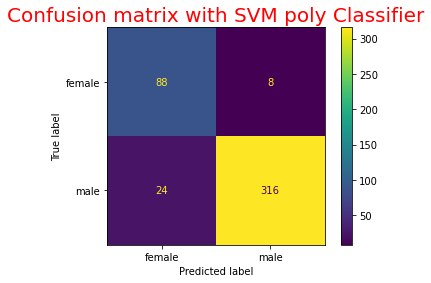

In [30]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf = svm.SVC(kernel='poly',degree=5) # poly Kernel
model = clf.fit(train_data, train_labels)

plot_confusion_matrix(clf, val_data, val_labels) 
plt.title(label="Confusion matrix with SVM poly Classifier",
          fontsize=20,
          color="red") 
plt.show()

# **Finally, predicting test data**

After all, we have tried three diffrent classifiers with diffrent hyperparamaters. We have seen that SVM with Poly degree 5 kernal gives the best result on validation set which was 92.6%. Therefore, it will be used to predict the labels for the test data.

In [28]:
clf = svm.SVC(kernel='poly',degree=5) # poly Kernel

#Train the model using the training sets
clf.fit(X, Y)

#Predict the response for test data
y_pred = clf.predict(test_data)
print("Accuracy on test data:",metrics.accuracy_score(test_labels, y_pred))

############################################################
print(classification_report(test_labels, clf.predict(test_data)))

Accuracy on test data: 0.9107551487414187
              precision    recall  f1-score   support

      female       0.76      0.90      0.83       102
        male       0.97      0.91      0.94       335

    accuracy                           0.91       437
   macro avg       0.86      0.91      0.88       437
weighted avg       0.92      0.91      0.91       437



Finally, we got the accuracy result for on the test data using SVM classigier to be 91.07% 